#  Random Data Sampling
- Random sampling é uma técnica ingênua de balanceamento de classes
  - O Oversampling randômico/aleatório duplica exemplos da classe minoritária do dataset em treinamento e pode resultar em overfitting.
    - "Um cenário de overfitting ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim." - [Underfitting e Overfitting](https://didatica.tech/underfitting-e-overfitting/).
  - O Undersampling aleatório exclui exemplos da classe majoritária/predominante e pode resultar em percas de informações relevantes para um modelo.

Ambas as técnicas podem ser combinadas repetidamente até que se chegue na distribuição de classes desejada

Serão utilizadas as bibliotecas
- [Scikit-learn](https://scikit-learn.org/stable/index.html)
- [Imbalanced-learn](https://imbalanced-learn.org/stable/)
- [Matplotlib](https://matplotlib.org/)

In [1]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

## Random Oversampling

Pode diminuir a performance do algoritmo de classificação e aumentar sua complexidade

    Pode ser implementado utilizando a classe RandomOverSampler.
    Recebe um argumento sampling_strategy que pode ser definida como 'minority'
    para automaticamente balancear a classe minoritária com a(s) classe(s) majoritária(s)

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [3]:
from collections import Counter
# definir dataset desbalanceado (prop. aproximada de 100/1)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           weights=[0.99], random_state=1, flip_y=0)

# definir estratégia de oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# utilizando a estratégia já definida, aplicamos a transformação
X_over, y_over = oversample.fit_resample(X, y)

print(f'Número de exemplos do dataset pré-oversampling\n Classe 0: {Counter(y)[0]}\n Classe 1: {Counter(y)[1]}')
print()
print(f'Número de exemplos do dataset pós-oversampling\n Classe 0: {Counter(y_over)[0]}\n Classe 1: {Counter(y_over)[1]}')

Número de exemplos do dataset pré-oversampling
 Classe 0: 990
 Classe 1: 10

Número de exemplos do dataset pós-oversampling
 Classe 0: 990
 Classe 1: 990


## Random Undersampling

In [15]:
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1,
                           weights=[0.99], random_state=1, flip_y=0)

undersample = RandomUnderSampler(sampling_strategy='majority')

X_over, y_over = undersample.fit_resample(X, y)

print(f'Número de exemplos do dataset pré-undersampling\n Classe 0: {Counter(y)[0]}\n Classe 1: {Counter(y)[1]}')
print()
print(f'Número de exemplos do dataset pós-undersampling\n Classe 0: {Counter(y_over)[0]}\n Classe 1: {Counter(y_over)[1]}')

Número de exemplos do dataset pré-undersampling
 Classe 0: 990
 Classe 1: 10

Número de exemplos do dataset pós-undersampling
 Classe 0: 10
 Classe 1: 10


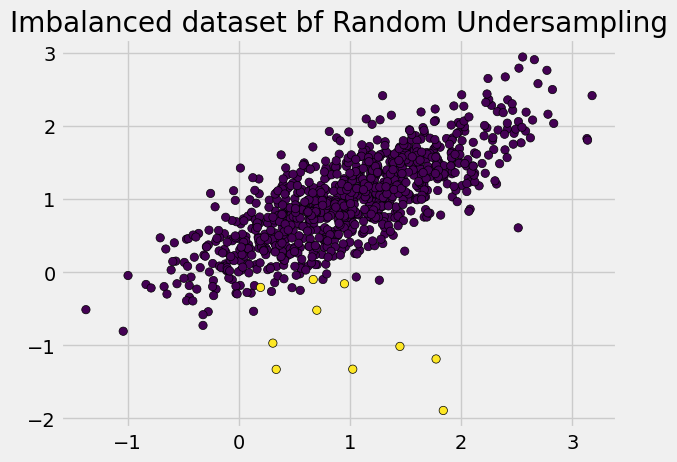

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='k')
plt.title('Imbalanced dataset bf Random Undersampling')
plt.savefig('preUS.png')

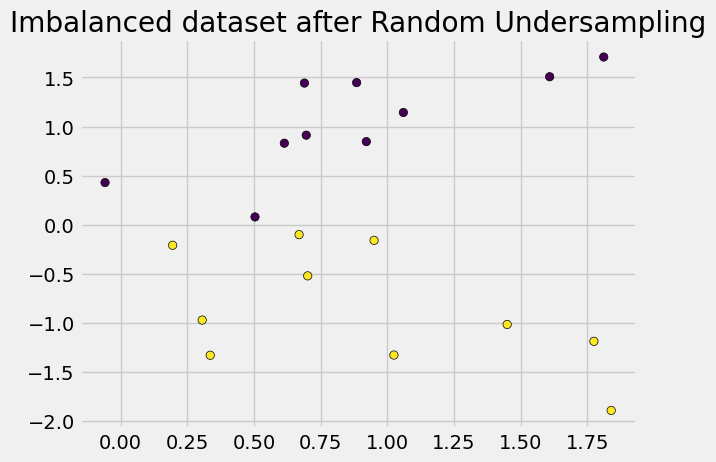

In [16]:
plt.scatter(X_over[:,0], X_over[:, 1], c=y_over, edgecolors='k')
plt.title('Imbalanced dataset after Random Undersampling')
plt.savefig('postUS.png')

## Combinando Over e Undersampling

## Avaliação de performance